**Description:-** In this Data Analysis Project, we will analyze the history of IPL (Indian Premier League) right from the start of the League in 2008 uptill 2020.

In [1]:
# Importing the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the datasets:
ipl_data1 = pd.read_csv("ipl_data.csv")
ipl_data2 = pd.read_csv("deliveries.csv")
match_data = pd.read_csv("matches.csv")

In this project we will make use of all the 3 datasets for analyzing the history of matches played in IPL from season 2008-2020 (13 seasons).

**Note:-** *ipl_data.csv* has ball-by-ball data ranging from 2008 to 2020 (13)seasons. Whereas, *deliveries.csv* and *matches.csv* consists of information for 2008 to 2016 (9)seasons.  

In [3]:
ipl_data1.head(3)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,runs_off_bat,extras,wides,noballs,byes,legbyes,wicket_type,player_dismissed,run,over
0,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,0,1,0.0,0.0,0.0,1.0,,,1,0
1,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0
2,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,1,1.0,0.0,0.0,0.0,,,1,0


In [4]:
ipl_data1.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'wicket_type', 'player_dismissed', 'run', 'over'],
      dtype='object')

In [5]:
ipl_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194354 entries, 0 to 194353
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          194354 non-null  int64  
 1   season            194354 non-null  int64  
 2   start_date        194354 non-null  object 
 3   venue             194354 non-null  object 
 4   innings           194354 non-null  int64  
 5   ball              194354 non-null  float64
 6   batting_team      194354 non-null  object 
 7   bowling_team      194354 non-null  object 
 8   striker           194354 non-null  object 
 9   non_striker       194354 non-null  object 
 10  bowler            194354 non-null  object 
 11  runs_off_bat      194354 non-null  int64  
 12  extras            194354 non-null  int64  
 13  wides             194354 non-null  float64
 14  noballs           194354 non-null  float64
 15  byes              194354 non-null  float64
 16  legbyes           19

In [6]:
ipl_data1.isnull().sum()

match_id            0
season              0
start_date          0
venue               0
innings             0
ball                0
batting_team        0
bowling_team        0
striker             0
non_striker         0
bowler              0
runs_off_bat        0
extras              0
wides               0
noballs             0
byes                0
legbyes             0
wicket_type         0
player_dismissed    0
run                 0
over                0
dtype: int64

In [7]:
ipl_data2.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [8]:
ipl_data2.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [9]:
ipl_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [10]:
ipl_data2.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [11]:
match_data.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [12]:
match_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [13]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [14]:
match_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

Performing the above steps we got to know some of the details about the data. In the next step we will start our analysis part.

**1. When and where was the first IPL match played? Also, which were the two teams competing against each other?**

To answer this question, we will use the *ipl_data1* dataset which contains the ball-by-ball information of all the matches played between 2008-2020 and some matches of 2021 (season 14).

In [15]:
ipl_data1.iloc[0]     # First instance (row) of the dataset.

match_id                                 335982
season                                     2008
start_date                           2008-04-18
venue                     M.Chinnaswamy Stadium
innings                                       1
ball                                        0.1
batting_team              Kolkata Knight Riders
bowling_team        Royal Challengers Bangalore
striker                              SC Ganguly
non_striker                         BB McCullum
bowler                                  P Kumar
runs_off_bat                                  0
extras                                        1
wides                                       0.0
noballs                                     0.0
byes                                        0.0
legbyes                                     1.0
wicket_type                                    
player_dismissed                               
run                                           1
over                                    

So the first ever IPL match was played on **2008-04-18** at **M.Chinnaswamy Stadium** between **Kolkata Knight Riders** and **The Royal Challengers Bangalore**.

In [16]:
ipl_data1.season.unique()        # List of seasons

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2019,
       2018, 2020, 2021], dtype=int64)

We have access to data from 2008 to 2021

**2. What is the number of matches played in each season of IPL history? Mention the year when maximum number of matches were played.**

In [92]:
data = ipl_data1.groupby(['match_id','season']).count().index.droplevel(level=0).value_counts().sort_index()

In [93]:
data

2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
2021     3
Name: season, dtype: int64

In [94]:
data.max()

76

In [95]:
data.idxmax()

2013

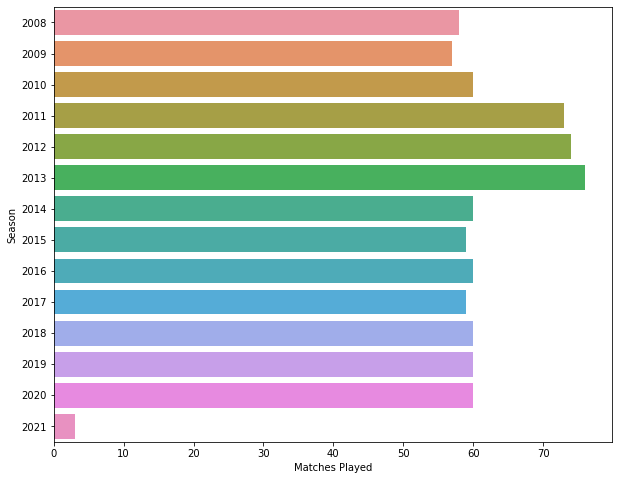

In [96]:
# Let's visualize this data:
plt.figure(figsize=(10,8))
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('Season')
plt.show()

Clearly, IPL season 2013 had the most (76) number of matches.

**3. How many different venues have been used for playing IPL uptill now?**

In [22]:
ipl_data1.venue.nunique()

34

**4. List top 10 venues, where most of the matches were played.**

In [23]:
ipl_data1.groupby(['venue', 'match_id']).count().droplevel(level=1).index.value_counts()[:10]

M.Chinnaswamy Stadium                                   80
Eden Gardens                                            77
Arun Jaitley Stadium                                    74
Wankhede Stadium, Mumbai                                74
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk, Chennai                59
Punjab Cricket Association IS Bindra Stadium, Mohali    56
Sawai Mansingh Stadium                                  47
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Name: venue, dtype: int64

**5. Mention the names of all the IPL team franchise in the history of IPL.**

In [24]:
ipl_data1.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Gujarat Lions', 'Delhi Capitals'],
      dtype=object)

**6. What is the number of matches played by each teams in IPL? Which team played the most number of matches in the IPL history?**

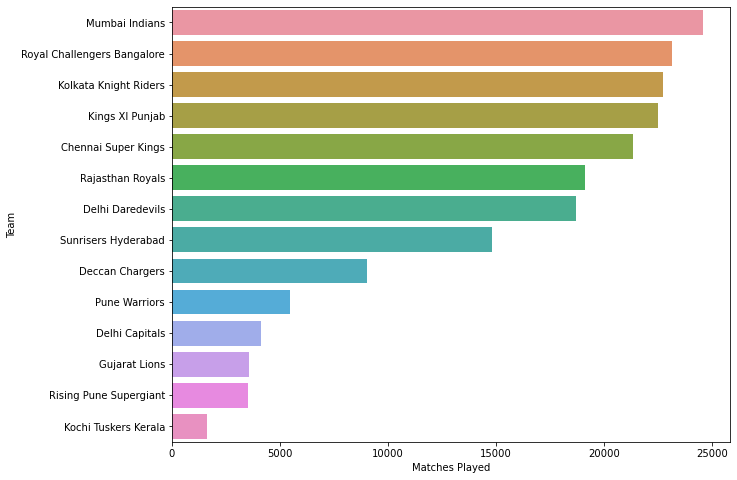

In [25]:
plt.figure(figsize=(10,8))
data = ipl_data1['bowling_team'].value_counts().sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('Team')
plt.show()

Mumbai Indians (MI) followed by RCB and KKR have played the most number of matches.

**7. Which team has won the most number of tosses?**

To answer this question we will use the match_data dataset that consists of match details like toss_winner, toss_result, etc.

In [26]:
match_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [27]:
match_data["toss_winner"].value_counts()

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

Mumbai Indians are lucky enough to win most number of tosses between the season 2008-2016.

**8. What is the most prefered decision by the teams after winning the toss?**

<AxesSubplot:xlabel='toss_decision', ylabel='count'>

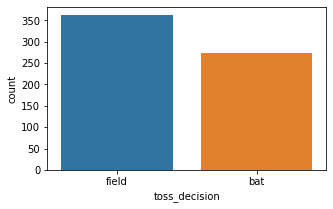

In [28]:
plt.figure(figsize = (5,3))
sns.countplot(x = match_data["toss_decision"])

It seems like teams are comfortable chasing in majority of the cases.

**9. What are the total number of runs scored by Individuals teams?**

In [29]:
ipl_data1.groupby(['batting_team'])['run'].sum().sort_values(ascending=False)

batting_team
Mumbai Indians                 32488
Royal Challengers Bangalore    30415
Kings XI Punjab                30064
Kolkata Knight Riders          29606
Chennai Super Kings            28560
Rajasthan Royals               24542
Delhi Daredevils               24296
Sunrisers Hyderabad            19539
Deccan Chargers                11463
Pune Warriors                   6358
Delhi Capitals                  5499
Gujarat Lions                   4862
Rising Pune Supergiant          4533
Kochi Tuskers Kerala            1901
Name: run, dtype: int64

**10. Which team on an average have scored the most runs in powerplay?**

In [30]:
ipl_data1[ipl_data1['over']<6].groupby(['match_id','batting_team']).sum()['run'].groupby('batting_team').mean().sort_values(ascending=False)[2:]

batting_team
Delhi Capitals                 48.176471
Sunrisers Hyderabad            47.856000
Rising Pune Supergiant         47.433333
Kings XI Punjab                47.126316
Kolkata Knight Riders          46.409326
Delhi Daredevils               45.714286
Deccan Chargers                45.560000
Mumbai Indians                 45.529412
Chennai Super Kings            45.195531
Rajasthan Royals               44.912500
Royal Challengers Bangalore    44.826531
Pune Warriors                  42.111111
Name: run, dtype: float64

Delhi Capitals have performed better in powerplay in comparison with other franchise of IPL.

**11. Top 5 batsman who have scored the most number of runs in IPL?**

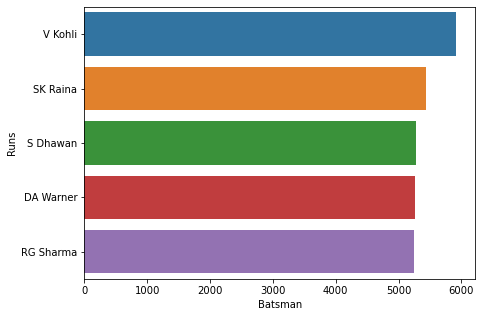

In [31]:
plt.figure(figsize=(7,5))
data = ipl_data1.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending=False)[:5]
sns.barplot(y=data.index,x=data, orient = 'h')
plt.xlabel('Batsman')
plt.ylabel('Runs')
plt.show()

King Kohli has scored the most number of runs in IPL with close to 6000 runs. Followed him is Suresh Raina and the Gabbar, Shikhar Dhawan.

**12. Which player has scored the most number of centuries?**

In [32]:
runs = ipl_data1.groupby(['striker','match_id'])['runs_off_bat'].sum()
runs[runs >= 100].droplevel(level=1).groupby('striker').count().sort_values(ascending=False)[:10]

striker
CH Gayle          6
V Kohli           5
DA Warner         4
SR Watson         4
AB de Villiers    3
HM Amla           2
M Vijay           2
KL Rahul          2
SV Samson         2
S Dhawan          2
Name: runs_off_bat, dtype: int64

When talking about centuries, who can forget the universal boss, Chris Gayle.

**13. Which player has scored the most number of fifties in IPL?**

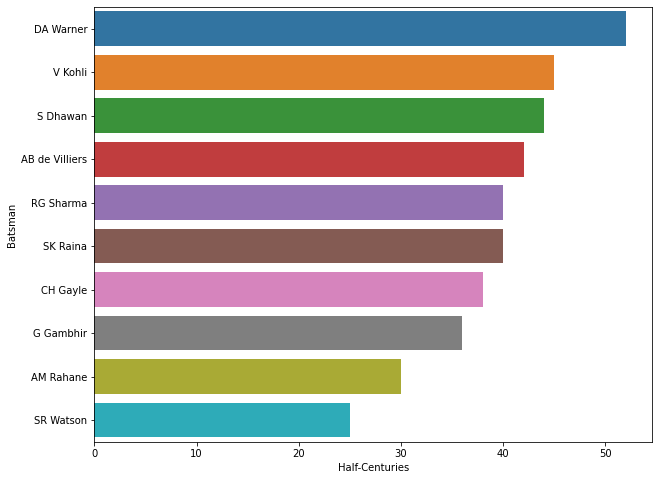

In [33]:
plt.figure(figsize=(10,8))
runs = ipl_data1.groupby(['striker','start_date'])['runs_off_bat'].sum()
data = runs[runs >= 50].droplevel(level=1).groupby('striker').count().sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Half-Centuries')
plt.ylabel('Batsman')
plt.show()

David Warner have perform marvolusly well when talking about the number of fifties. Second in the list is the run-machine, King Kohli.

**14. Give the list of Orange cap holders in each season of IPL and also the number of runs scored by them.**

In [38]:
data = ipl_data1.groupby(['season','striker'])['runs_off_bat'].sum().groupby('season').max()
temp_df=pd.DataFrame(ipl_data1.groupby(['season','striker'])['runs_off_bat'].sum())
print("{0:10}{1:20}{2:30}".format("Season","Player","Runs"))
for season,run in data.items():
    player = temp_df.loc[season][temp_df.loc[season]['runs_off_bat'] == run].index[0]
    print(season,'\t ',player,'\t\t',run)

Season    Player              Runs                          
2008 	  SE Marsh 		 616
2009 	  ML Hayden 		 572
2010 	  SR Tendulkar 		 618
2011 	  CH Gayle 		 608
2012 	  CH Gayle 		 733
2013 	  MEK Hussey 		 733
2014 	  RV Uthappa 		 660
2015 	  DA Warner 		 562
2016 	  V Kohli 		 973
2017 	  DA Warner 		 641
2018 	  KS Williamson 		 735
2019 	  DA Warner 		 692
2020 	  KL Rahul 		 676
2021 	  S Dhawan 		 85


**15. Most runs scored by a batsman in any season of IPL?**

In [44]:
ipl_data1.groupby(['striker','season'])['runs_off_bat'].sum().sort_values(ascending=False)[:10]

striker         season
V Kohli         2016      973
DA Warner       2016      848
KS Williamson   2018      735
MEK Hussey      2013      733
CH Gayle        2012      733
                2013      720
DA Warner       2019      692
AB de Villiers  2016      687
RR Pant         2018      684
KL Rahul        2020      676
Name: runs_off_bat, dtype: int64

2016 season was an iconic season for the run machine Virat Kohli, where he hits the most number of runs in any IPL seasons, thanks to his 4 centuries in a row.

**16. List of Top 10 batsmans who have hit the most number of sixes in an inning?**

In [39]:
ipl_data1[ipl_data1['runs_off_bat'] == 6].groupby(['start_date','striker']).count()['season'].sort_values(ascending=False).droplevel(level=0)[:10]

striker
CH Gayle          17
BB McCullum       13
CH Gayle          13
CH Gayle          12
AB de Villiers    12
M Vijay           11
CH Gayle          11
AD Russell        11
ST Jayasuriya     11
SS Iyer           10
Name: season, dtype: int64

Chris Gayle is a true legend and a hard hitting batsman. Second in this list is Brendon McCullum, thanks to his knock of 158 against RCB in the first ever IPL match.

**17. List of top 5 players who have hit the most number of sixes in IPL history?**

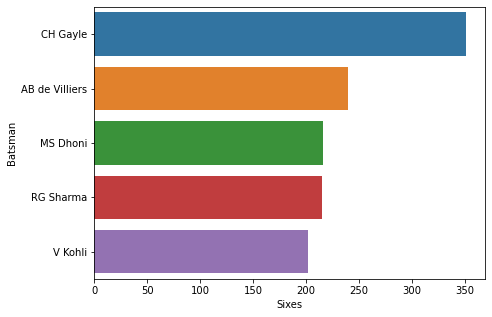

In [41]:
plt.figure(figsize=(7,5))
data = ipl_data1[ipl_data1['runs_off_bat'] == 6]['striker'].value_counts()[:5]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Sixes')
plt.ylabel('Batsman')
plt.show()

Again, Chris Gayle tops this list. Chris is a six hitting machine.

**18. Top 5 players who have hit the most number of 4's in an inning?**

In [42]:
ipl_data1[ipl_data1['runs_off_bat'] == 4].groupby(['start_date','striker']).count()['season'].sort_values(ascending=False).droplevel(level=0)[:5]

striker
PC Valthaty       19
AB de Villiers    19
MJ Lumb           16
AM Rahane         16
GJ Maxwell        15
Name: season, dtype: int64

Paul Valthaty and AB de Villiers have top this list with almost 80 runs coming from just 4's.

**19. Most boundaries (4's) hit by a batsman in IPL.**

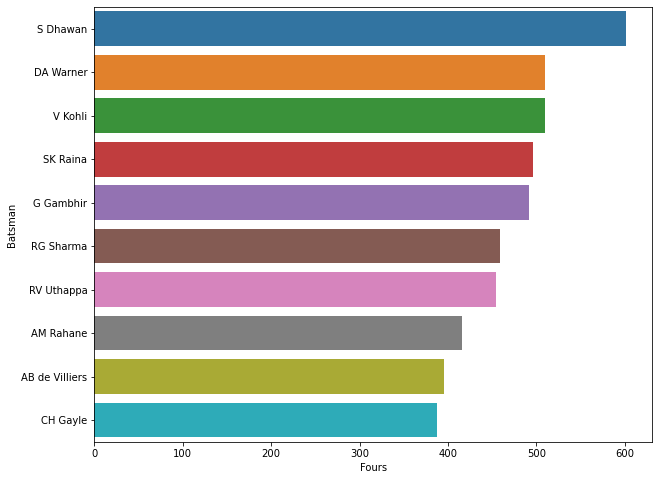

In [43]:
plt.figure(figsize=(10,8))
data = ipl_data1[ipl_data1['runs_off_bat'] == 4]['striker'].value_counts()[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Fours')
plt.ylabel('Batsman')
plt.show()

The Gabbar, Shikhar Dhawan is a master player for his ability to find the gaps between the field.

**20. Mention the list of Top 5 highest team scores in IPL.**

In [45]:
ipl_data1.groupby(['start_date','batting_team']).sum()['run'].droplevel(level=0).sort_values(ascending=False)[:5]

batting_team
Royal Challengers Bangalore    263
Royal Challengers Bangalore    248
Chennai Super Kings            246
Kolkata Knight Riders          245
Chennai Super Kings            240
Name: run, dtype: int64

**21. Who have scored the highest individual score in IPL?**

In [51]:
ipl_data1.groupby(['striker','start_date'])['runs_off_bat'].sum().sort_values(ascending=False)[:10]

striker         start_date
CH Gayle        2013-04-23    175
BB McCullum     2008-04-18    158
AB de Villiers  2015-05-10    133
KL Rahul        2020-09-24    132
AB de Villiers  2016-05-14    129
CH Gayle        2012-05-17    128
RR Pant         2018-05-10    128
M Vijay         2010-04-03    127
DA Warner       2017-04-30    126
V Sehwag        2014-05-30    122
Name: runs_off_bat, dtype: int64

Chris Gayle has been a successful player in IPL, having records for the highest ever individual score in an IPL match, most number of sixes in an inning and most number of sixes in all IPL seasons. He is a destructive player and a nightmare for many indian and overseas bowlers.

In [46]:
match_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**22. Which team has won the most number of matches between the season 2008-2016?**

In [54]:
match_data['winner'].value_counts()

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

Mumbai Indians have been a successful campaign for many seasons, thanks to their great mixture of experienced and young hard hitting players.

In the match_data dataset, we have win_by_runs (batting first) and win_by_wickets (batting second) columns. These columns can help us to analyze the success rate of batting first and batting second.

In [60]:
win_by_batting_1st = match_data[match_data["win_by_runs"] != 0]

In [61]:
len(win_by_batting_1st)

287

In [62]:
win_by_batting_2nd = match_data[match_data["win_by_wickets"] != 0]

In [63]:
len(win_by_batting_2nd)

339

**23. What is the percentage of matches won by teams batting 1st?**

In [64]:
len(win_by_batting_1st) / len(match_data) * 100

45.125786163522015

**24. What is the percentage of matches won by teams batting 2nd?**

In [65]:
len(win_by_batting_2nd) / len(match_data) * 100

53.301886792452834

In [77]:
# Bowling Performance:

**25. List all the Purple cap holders in different seasons of IPL.**

In [78]:
lst = ['caught','bowled','lbw','stumped','caught and bowled','hit wicket']
data = ipl_data1[ipl_data1['wicket_type'].apply(lambda x: True if x in lst and x != np.nan else False)].groupby(['season','bowler']).count()['ball']
data=data.sort_values(ascending=False)[:30].sort_index(level=0)
val=0
lst=[]
print("{0:10}{1:20}{2:30}".format("Season","Player","Wickets"))
for (season,bowler),wicket in data.items():
    if season == val:
        lst.append(wicket)        
    else:
        print(season,'\t ',bowler,'\t\t',wicket)
        val = season
        lst=[]

Season    Player              Wickets                       
2008 	  Sohail Tanvir 		 22
2009 	  A Kumble 		 21
2011 	  MM Patel 		 22
2012 	  M Morkel 		 25
2013 	  DJ Bravo 		 32
2014 	  MM Sharma 		 23
2015 	  A Nehra 		 22
2016 	  B Kumar 		 23
2017 	  B Kumar 		 26
2018 	  AJ Tye 		 24
2019 	  DL Chahar 		 22
2020 	  A Nortje 		 22


**26. Which bowler has taken the most number of wickets in IPL?**

In [80]:
lst = ['caught','bowled','lbw','stumped','caught and bowled','hit wicket']
ipl_data1[ipl_data1['wicket_type'].apply(lambda x: True if x in lst and x != ' ' else False)]['bowler'].value_counts()[:1]

SL Malinga    170
Name: bowler, dtype: int64

Lasith Malinga a Sri-Lankan fast bowler has trouble many legendary batsmans with his perfect yorkers. He has taken the most number of wickets in IPL uptill now. Surprisingly, Malinga has never won the Purple Cap for any seasons.

**27. List Top 6 bowlers that have bowled the most number of dot balls.**

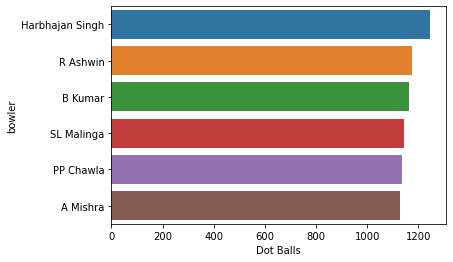

In [81]:
plt.figure(figsize=(6,4))
data = ipl_data1[ipl_data1['run'] == 0].groupby('bowler').count()['match_id'].sort_values(ascending=False)[:6]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Dot Balls')
plt.ylabel('bowler')
plt.show()

Before the tournament was even started, some of the most experienced cricketers in the world had predicted that spinners in IPL will be the ones who will conceed the most punishment. But after soo many seasons it is clear that the trend is reversed with Harbhajan Singh (Indian Right arm off spinner) being one of the most economical bowlers.

**28. Most Maiden overs by a bowler?**

In [82]:
data = ipl_data1.groupby(['start_date','bowler','over'])['run'].sum()
data = data[data.values == 0].droplevel(level=[0,2])
data.index.value_counts()[:10]

P Kumar           12
IK Pathan          9
SL Malinga         8
DW Steyn           8
B Kumar            7
DS Kulkarni        7
Sandeep Sharma     6
DJ Bravo           6
R Ashwin           5
Z Khan             5
Name: bowler, dtype: int64

Pravin kumar has bowled the most number (12) of maiden overs in the history of IPL.

**29. Which team has taken the most number of wickets in IPL?**

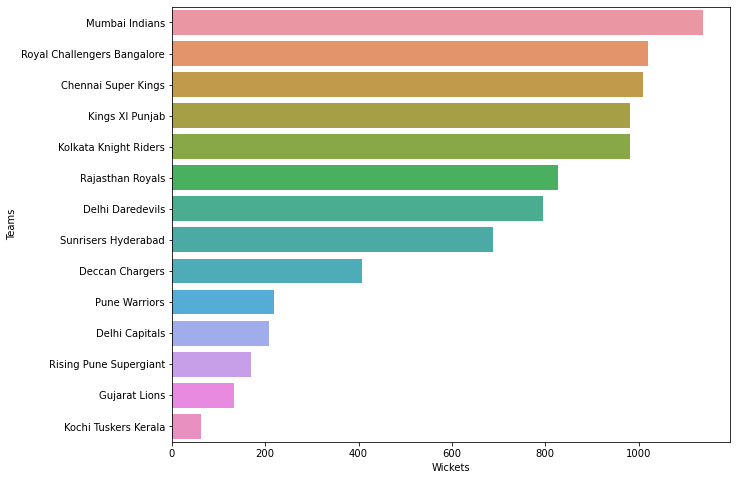

In [84]:
plt.figure(figsize=(10,8))
lst = ['caught','bowled','lbw','stumped','caught and bowled','hit wicket']
data = ipl_data1[ipl_data1['wicket_type'].apply(lambda x: True if x in lst and x != ' ' else False)]['bowling_team'].value_counts()
ipl_data1.groupby(['batting_team'])['extras'].agg('sum').sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Wickets')
plt.ylabel('Teams')
plt.show()

**30. Which bowler has bowled the most number of 'No Balls' in IPL?**

In [85]:
ipl_data1[ipl_data1['noballs'] != 0]['bowler'].value_counts()[:10]

S Sreesanth    23
JJ Bumrah      23
A Mishra       21
I Sharma       21
UT Yadav       19
SL Malinga     18
AB Dinda       14
JA Morkel      13
M Morkel       13
RP Singh       13
Name: bowler, dtype: int64

We have two best Indian fast bowlers who have bowled the most number of 'No Balls'.

**31. Most runs given by teams as extras?**

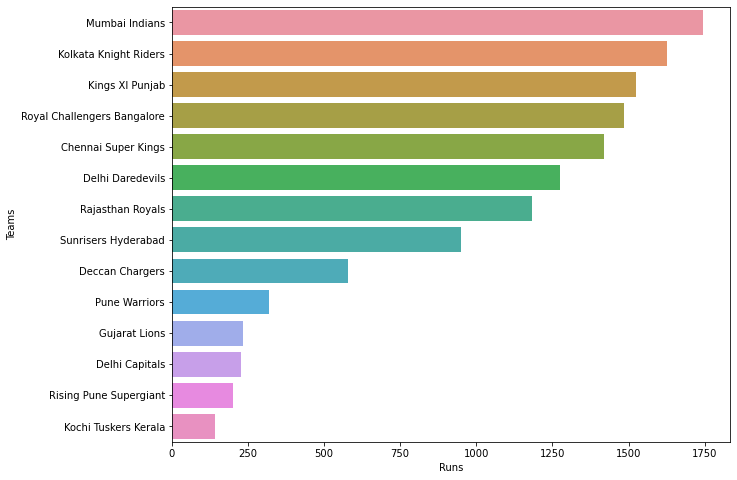

In [86]:
plt.figure(figsize=(10,8))
data = ipl_data1.groupby(['batting_team'])['extras'].agg('sum').sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Runs')
plt.ylabel('Teams')
plt.show()

In [88]:
match_data.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


**32. Which player has won the most number of Player of the Match awards?**

In [89]:
match_data["player_of_match"].value_counts()

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
                  ..
AD Mathews         1
LR Shukla          1
R Bhatia           1
A Singh            1
BCJ Cutting        1
Name: player_of_match, Length: 201, dtype: int64

Christopher Henry Gayle has won the most number of "Player of the Match" awards in IPL.

## END OF ANALYSIS